# Newton method

Find $x$ such that $f(x)=0$ using the Newton method.

## function
$$\large
\begin{eqnarray*}
f(x) & = & x^2 - 3x + 2\\
f^{'}(x) & = & 2x - 3 \\
\end{eqnarray*}
$$

## iteration
$$\large
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}\\
$$

* https://en.wikipedia.org/wiki/Newton%27s_method

# Find $x$ such that $f(x)=0$ using the Newton method

{'solution': 1.0, 'iteration': 6, 'xn_list': [0, 0.6666666666666666, 0.9333333333333333, 0.9960784313725493, 0.999984740978103, 0.9999999997671692, 1.0]}


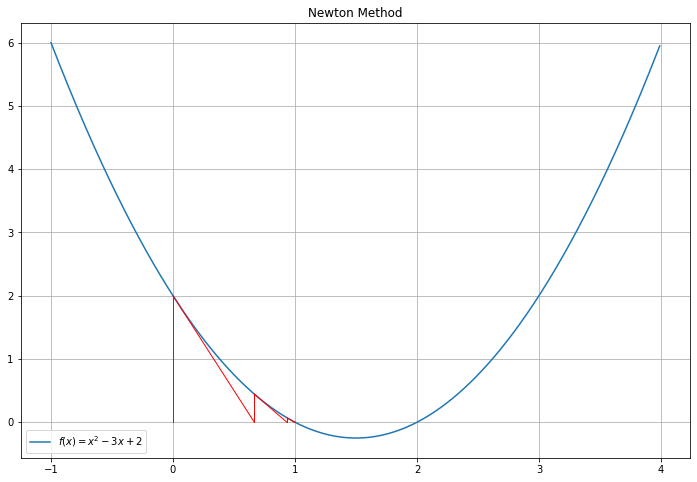

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NewtonMethod():
    def __init__(self, f=False, f_prime=False, f_coefficients=None, polynomial=True):
        self.max_iteration = 100
        self.epsilon = 1e-8
        self.tolerance = 1e-8
        self.i = 0
        self.xn = None
        self.xn_list = []
        self.f = f if f else None
        self.f_prime = f_prime if f_prime else None
        
        if polynomial:
            self.f_coefficients = f_coefficients
            self.f_prime_coefficients = np.polyder(f_coefficients)
            self.f = lambda x, c=self.f_coefficients: np.polyval(c, x)
            self.f_prime = lambda x, c=self.f_prime_coefficients: np.polyval(c, x)
        
    def newton_raphson(self, initial_guess):
        xn = initial_guess
        self.xn_list.append(xn)
        for _ in range(self.max_iteration):
            f_xn = self.f(xn)
            f_prime_xn = self.f_prime(xn)
            if abs(f_prime_xn) < self.epsilon: # denominator shouldn't be 0
                break
            xn = xn - f_xn / f_prime_xn
            self.xn_list.append(xn)
            self.i += 1
            
            if abs(f_xn) < self.tolerance:
                break
        self.xn = xn
        return xn
    
    def plot(self, label=None):
        fig, ax = plt.subplots(figsize=(12, 8))
        x = np.arange(-1, 4, 0.01)
        
        if not label:
            label = ""
        ax.plot(x, self.f(x), label=label)
        for i in range(len(self.xn_list)-1):
            x0 = self.xn_list[i]
            x1 = self.xn_list[i+1]
            y0 = self.f(x0)
            ax.plot([x0, x0], [0, y0], color='r', linewidth=1)
            ax.plot([x0, x1], [y0, 0], color='r', linewidth=1)

        ax.set_title('Newton Method')
        ax.legend()
        ax.grid()

    def reset(self):
        self.i = 0
        self.xn_list.clear()
    
    def result(self):
        result_dic = {'solution':self.xn,
                      'iteration': self.i,
                      'xn_list': self.xn_list
                      }
        return result_dic
    
    def __repr__(self):
        return str(self.result())
        

label = '$f(x)=x^2 - 3x + 2$'
f_coefficients = [1, -3, 2] 
nm = NewtonMethod(f_coefficients=f_coefficients, polynomial=True)
initial_guess = 0
nm.newton_raphson(initial_guess)
result = nm.result()
print(result)

nm.plot(label)

# verify the solution using np.roots()

In [2]:
import numpy as np

f_coefficients = [1, -3, 2]
roots = np.roots(f_coefficients)
roots # correct

array([2., 1.])

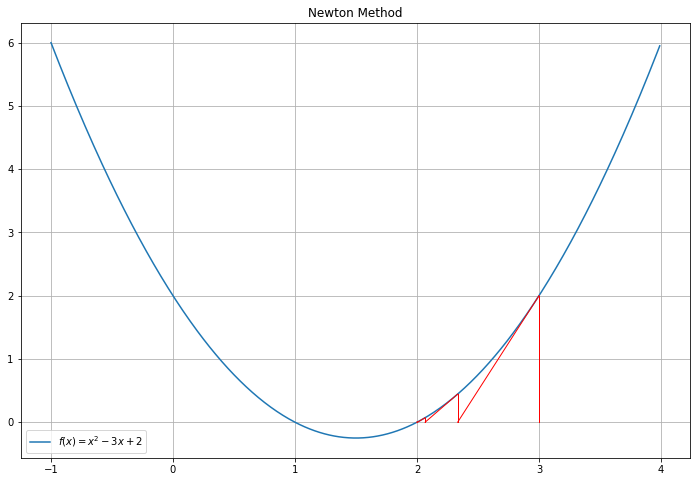

In [3]:
nm.reset()
nm.newton_raphson(3)
nm.plot(label)

# Example 2
## function
$$\large
\begin{eqnarray*}
f(x) & = & x^3 - 6x^2 + 11x -6\\
f^{'}(x) & = & 3x^2 -12x + 11 \\
\end{eqnarray*}
$$

{'solution': 3.0, 'iteration': 7, 'xn_list': [4, 3.4545454545454546, 3.151046789377546, 3.025325928976698, 3.000908451943052, 3.0000012353089467, 3.0000000000022893, 3.0]}


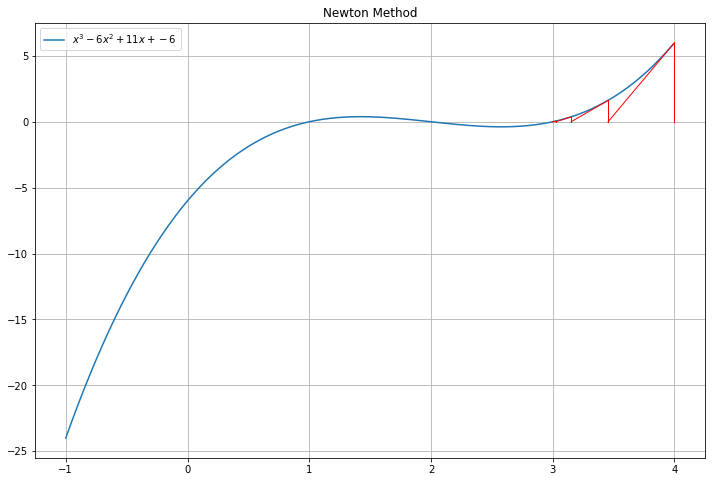

In [4]:
f_coefficients = [1, -6, 11, -6]
label = '$x^3-6x^2+11x+-6$'
nm2 = NewtonMethod(f_coefficients=f_coefficients, polynomial=True)
nm2.newton_raphson(4)
nm2.plot(label)
print(nm2)
nm2.reset()

{'solution': 1.0000000000000002, 'iteration': 7, 'xn_list': [0, 0.5454545454545454, 0.8489532106224531, 0.9746740710233021, 0.9990915480569487, 0.9999987646910548, 0.9999999999977109, 1.0000000000000002]}


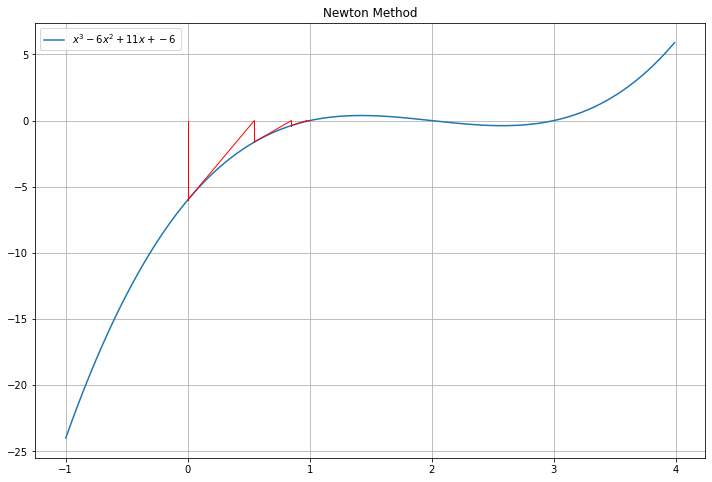

In [5]:
nm2.newton_raphson(0)
nm2.plot(label)
print(nm2)

In [7]:
import numpy as np

f_coefficients = [1, -6, 11, -6]
roots = np.roots(f_coefficients)
roots # correct

array([3., 2., 1.])

# Find a local minimum or maximum
$$\large
g(x) = f^{'}(x)
$$

Find $x$ s.t. $g(x)=0$

{'solution': 1.422649730810374, 'iteration': 7, 'xn_list': [0, 0.9166666666666666, 1.3044871794871795, 1.4126122533380598, 1.4225639689311216, 1.422649724441617, 1.4226497308103745, 1.422649730810374]}
critical point : (x, f(x)) =  (1.422649730810374, 0.3849001794597502)


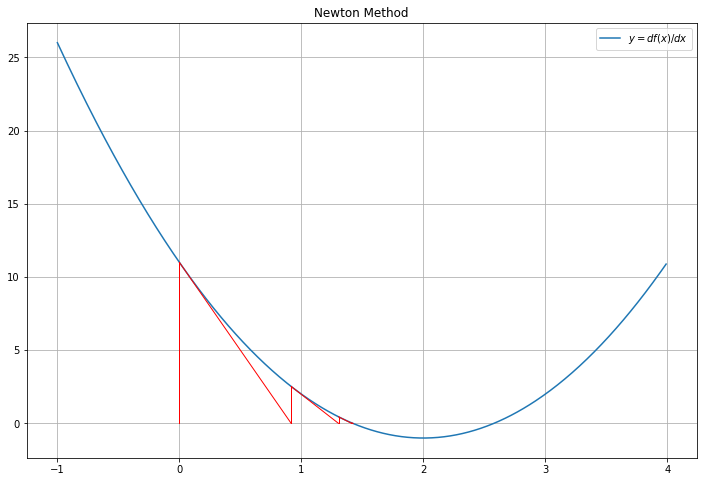

In [20]:
label = '$y = df(x)/dx$'
f_coefficients = [1, -6, 11, -6]
f_prime_coefficients = np.polyder(f_coefficients)
nm3 = NewtonMethod(f_coefficients=f_prime_coefficients)
nm3.newton_raphson(0)
nm3.plot(label)
print(nm3)
print("critical point : (x, f(x)) = ", (nm3.xn, np.polyval(f_coefficients, nm3.xn)))

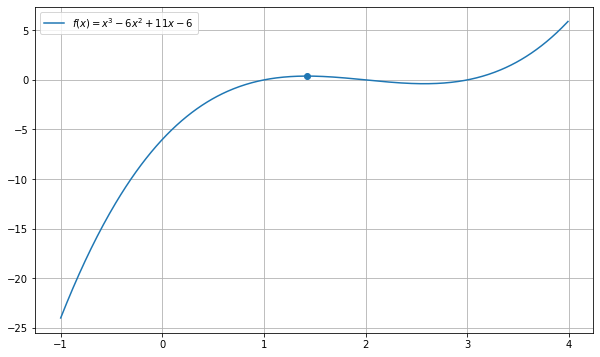

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1, 4, 0.01)
y = np.polyval(f_coefficients, x)
xn = nm3.xn
yn = np.polyval(f_coefficients, xn)
label = '$f(x) = x^3 - 6x^2 + 11x -6$'
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=label)
ax.scatter(nm3.xn, yn)
ax.grid()
ax.legend()